In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import preprocessing
sns.set(style='white', context='notebook', palette='deep')

/Users/chen/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train_len = len(train)
test_len = len(test)

In [61]:
train_len

891

In [62]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

### Outliers

In [3]:
def detect_outliers(df, n, features):
    outiler_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outiler_step = 1.5*IQR
        outiler_list_col = df[(df[col] > Q3+outiler_step) | (df[col] < Q1-outiler_step)].index
        outiler_indices.extend(outiler_list_col)
    
    outiler_indices = Counter(outiler_indices)
    outiler_rst = [k for k, v in outiler_indices.items() if v > n]
    return outiler_rst

In [4]:
outlier_list = detect_outliers(train, 2, ['Age', 'Fare', 'Parch', 'SibSp'])
train.loc[outlier_list]

/Users/chen/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


PassengerId  Survived  Pclass                               Name     Sex  \
27            28         0       1     Fortune, Mr. Charles Alexander    male   
88            89         1       1         Fortune, Miss. Mabel Helen  female   
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
324          325         0       3           Sage, Mr. George John Jr    male   
341          342         1       1     Fortune, Miss. Alice Elizabeth  female   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   

      Age  SibSp  Parch    Ticket    Fare        Cabin Embarked  
27   19.0      3      2     19950  263.00  C23 C25 C27        S  
88   23.0      3      2     19950  263.00  C23 C25 C27        S  
159   NaN      8      2  CA. 2343   69.55          NaN        S  
180   NaN      8      2  CA. 2343   69.55          NaN        S  
201   NaN      8      2  CA. 2343   69.55          NaN        S  
792   NaN      8      2  CA. 2343   69.55          NaN        S  
324   NaN      8      2  CA. 2343   69.55          NaN        S  
341  24.0      3      2     19950  263.00  C23 C25 C27        S  
863   NaN      8      2  CA. 2343   69.55          NaN        S  
846   NaN      8      2  CA. 2343   69.55          NaN        S

In [5]:
train = train.drop(train.index[outlier_list], axis=0).reset_index(drop=1)

### Analysis

In [6]:
dataset = pd.concat([train, test]).reset_index(drop=True)

In [7]:
dataset.describe()
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

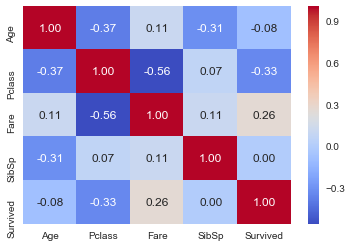

In [8]:
g = sns.heatmap(train[['Age', 'Pclass', 'Fare', 'SibSp', 'Survived']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

#### Age

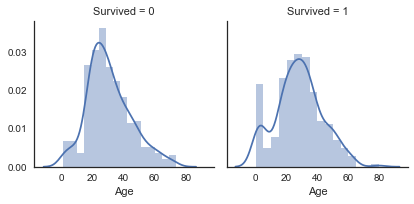

In [9]:
g = sns.FacetGrid(train, col = 'Survived')
g = g.map(sns.distplot, 'Age')

#### Pclass

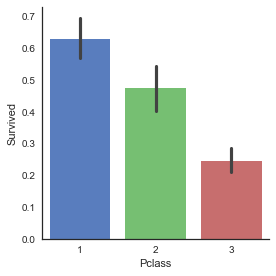

In [10]:
g = sns.factorplot(x='Pclass', y='Survived', data=train, kind='bar', palette='muted')

In [11]:
dummies_pclass = pd.get_dummies(dataset.Pclass, prefix='Pclass')
dataset = pd.concat([dataset, dummies_pclass], axis=1)

#### Sex

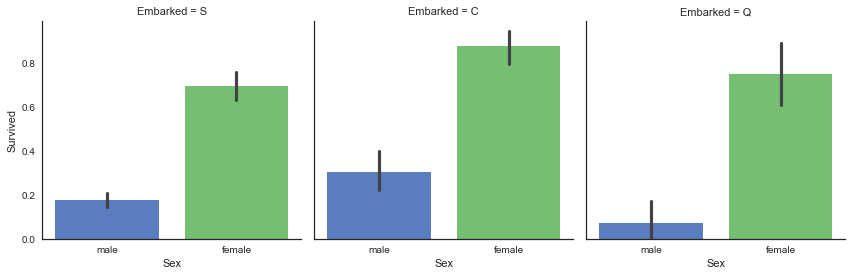

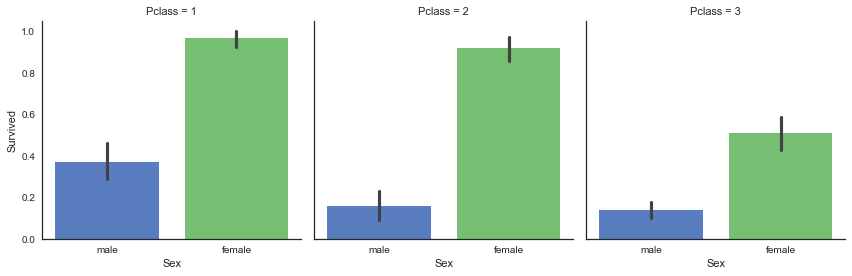

In [12]:
g = sns.factorplot(x='Sex', y='Survived', col='Embarked', data=train, kind='bar', palette='muted')
g = sns.factorplot(x='Sex', y='Survived', col='Pclass', data=train, kind='bar', palette='muted')

In [13]:
dummies_Sex = pd.get_dummies(dataset.Sex, prefix='Sex')
dataset = pd.concat([dataset, dummies_Sex], axis=1)

#### Fare

In [14]:
dataset.Fare.isnull().sum()

1

In [15]:
dataset.Fare = dataset.Fare.fillna(dataset.Fare.mean())

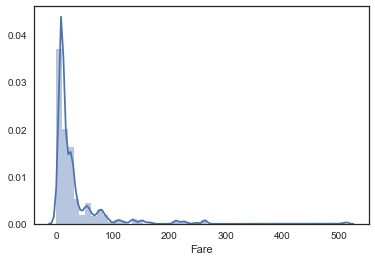

In [16]:
g = sns.distplot(dataset.Fare)

+ Use log to reduce the skewness

In [17]:
dataset.Fare = dataset.Fare.map(lambda x: np.log(x) if x > 0 else 0)

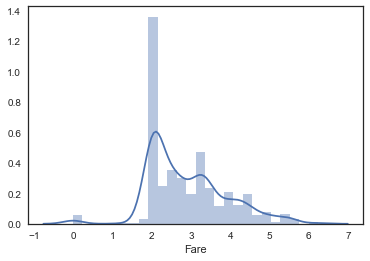

In [18]:
g = sns.distplot(dataset.Fare)

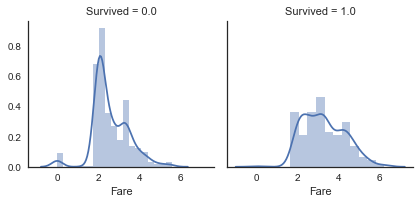

In [19]:
g = sns.FacetGrid(dataset, col='Survived')
g = g.map(sns.distplot, 'Fare')

In [20]:
dataset

Age Cabin Embarked      Fare  \
0     22.0   NaN        S  1.981001   
1     38.0   C85        C  4.266662   
2     26.0   NaN        S  2.070022   
3     35.0  C123        S  3.972177   
4     35.0   NaN        S  2.085672   
5      NaN   NaN        Q  2.135148   
6     54.0   E46        S  3.948596   
7      2.0   NaN        S  3.048088   
8     27.0   NaN        S  2.409941   
9     14.0   NaN        C  3.403555   
10     4.0    G6        S  2.815409   
11    58.0  C103        S  3.279030   
12    20.0   NaN        S  2.085672   
13    39.0   NaN        S  3.442819   
14    14.0   NaN        S  2.061048   
15    55.0   NaN        S  2.772589   
16     2.0   NaN        Q  3.371597   
17     NaN   NaN        S  2.564949   
18    31.0   NaN        S  2.890372   
19     NaN   NaN        C  1.977547   
20    35.0   NaN        S  3.258097   
21    34.0   D56        S  2.564949   
22    15.0   NaN        Q  2.083085   
23    28.0    A6        S  3.569533   
24     8.0   NaN        S  3.048088   
25    38.0   NaN        S  3.446410   
26     NaN   NaN        C  1.977547   
27     NaN   NaN        Q  2.064226   
28     NaN   NaN        S  2.066331   
29    40.0   NaN        C  3.322183   
...    ...   ...      ...       ...   
1269  21.0   NaN        Q  2.047693   
1270   6.0   NaN        S  3.048088   
1271  23.0   B24        S  4.537961   
1272  51.0   D28        S  3.673766   
1273  13.0   NaN        S  3.008155   
1274  47.0   NaN        S  2.351375   
1275  29.0   NaN        S  3.092178   
1276  18.0   C31        S  4.094345   
1277  24.0   NaN        Q  1.981001   
1278  48.0   B41        C  4.371976   
1279  22.0   NaN        S  2.050913   
1280  31.0   NaN        Q  2.045536   
1281  30.0    C7        S  5.105137   
1282  38.0   NaN        S  3.044522   
1283  22.0   NaN        C  4.084294   
1284  17.0   NaN        S  3.852273   
1285  43.0   D40        C  3.322183   
1286  20.0   D38        C  2.629187   
1287  23.0   NaN        S  2.351375   
1288  50.0   C80        C  5.354225   
1289   NaN   NaN        Q  2.043918   
1290   3.0   NaN        S  2.622855   
1291   NaN   NaN        Q  2.047693   
1292  37.0   C78        Q  4.499810   
1293  28.0   NaN        S  2.050913   
1294   NaN   NaN        S  2.085672   
1295  39.0  C105        C  4.690430   
1296  38.5   NaN        S  1.981001   
1297   NaN   NaN        S  2.085672   
1298   NaN   NaN        C  3.107198   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
5                                      Moran, Mr. James      0            6   
6                               McCarthy, Mr. Timothy J      0            7   
7                        Palsson, Master. Gosta Leonard      1            8   
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2            9   
9                   Nasser, Mrs. Nicholas (Adele Achem)      0           10   
10                      Sandstrom, Miss. Marguerite Rut      1           11   
11                             Bonnell, Miss. Elizabeth      0           12   
12                       Saundercock, Mr. William Henry      0           13   
13                          Andersson, Mr. Anders Johan      5           14   
14                 Vestrom, Miss. Hulda Amanda Adolfina      0           15   
15                     Hewlett, Mrs. (Mary D Kingcome)       0           16   
16                                 Rice, Master. Eugene      1           17   
17                         Williams, Mr. Charles Eugene      0           18   
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...      0           19   
19      

#### SibSp

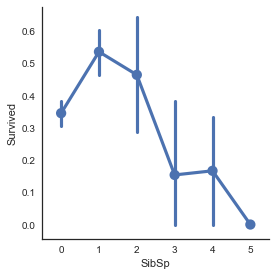

In [21]:
g = sns.factorplot(x='SibSp', y='Survived', data=train)

In [22]:
train.loc[train['SibSp']==5]

PassengerId  Survived  Pclass                                Name  \
58            60         0       3  Goodwin, Master. William Frederick   
70            72         0       3          Goodwin, Miss. Lillian Amy   
379          387         0       3     Goodwin, Master. Sidney Leonard   
473          481         0       3      Goodwin, Master. Harold Victor   
676          684         0       3         Goodwin, Mr. Charles Edward   

        Sex   Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
58     male  11.0      5      2  CA 2144  46.9   NaN        S  
70   female  16.0      5      2  CA 2144  46.9   NaN        S  
379    male   1.0      5      2  CA 2144  46.9   NaN        S  
473    male   9.0      5      2  CA 2144  46.9   NaN        S  
676    male  14.0      5      2  CA 2144  46.9   NaN        S

#### Embarked

In [23]:
dataset.Embarked.describe()

count     1297
unique       3
top          S
freq       904
Name: Embarked, dtype: object

In [24]:
dataset.Embarked = dataset.Embarked.fillna('S')

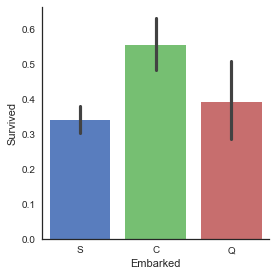

In [25]:
g = sns.factorplot(x='Embarked', y='Survived', data=train, kind='bar', palette='muted')

### Missing Value

In [26]:
dataset.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1043.000000  1299.000000  1299.000000  1299.000000  1299.000000   
mean     29.903806     2.897710     0.372594   657.093149     2.294072   
std      14.427548     0.994817     0.857157   377.743244     0.837150   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     2.066331     0.000000   331.500000     2.000000   
50%      28.000000     2.670985     0.000000   657.000000     3.000000   
75%      39.000000     3.424126     0.000000   984.500000     3.000000   
max      80.000000     6.238967     9.000000  1309.000000     3.000000   

             SibSp    Survived     Pclass_1     Pclass_2     Pclass_3  \
count  1299.000000  881.000000  1299.000000  1299.000000  1299.000000   
mean      0.452656    0.385925     0.246343     0.213241     0.540416   
std       0.879416    0.487090     0.431047     0.409754     0.498556   
min       0.000000    0.000000     0.000000     0.000000     0.000000   
25%       0.000000    0.000000     0.000000     0.000000     0.000000   
50%       0.000000    0.000000     0.000000     0.000000     1.000000   
75%       1.000000    1.000000     0.000000     0.000000     1.000000   
max       8.000000    1.000000     1.000000     1.000000     1.000000   

        Sex_female     Sex_male  
count  1299.000000  1299.000000  
mean      0.354888     0.645112  
std       0.478664     0.478664  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

In [27]:
dataset.isnull().sum()

Age             256
Cabin          1007
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_female        0
Sex_male          0
dtype: int64

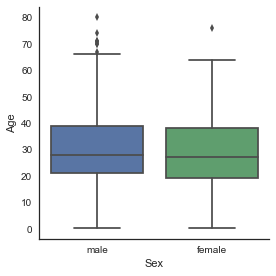

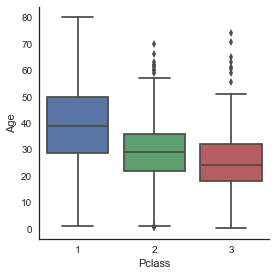

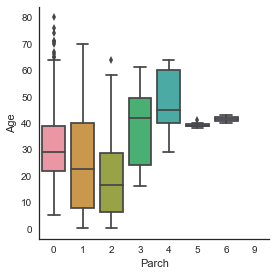

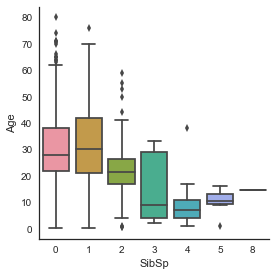

In [28]:
g = sns.factorplot(y='Age', x='Sex', data=dataset, kind='box')
g = sns.factorplot(y="Age", x="Pclass", data=dataset,kind="box")
g = sns.factorplot(y="Age", x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age", x="SibSp", data=dataset,kind="box")

In [46]:
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

/Users/chen/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
dataset.isnull().sum()

Age               0
Cabin          1007
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_female        0
Sex_male          0
dtype: int64

### Feature engineering

In [54]:
train = dataset[: train_len]
test = dataset[train_len: ]
test.drop(labels=['Survived'], axis=1, inplace=True)

/Users/chen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [56]:
train.Survived = train.Survived.astype(int)
Y_train = train.Survived
X_train = train.drop(labels=['Survived'], axis=1)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [57]:
train

Age        Cabin Embarked      Fare  \
0    22.0          NaN        S  1.981001   
1    38.0          C85        C  4.266662   
2    26.0          NaN        S  2.070022   
3    35.0         C123        S  3.972177   
4    35.0          NaN        S  2.085672   
5    25.0          NaN        Q  2.135148   
6    54.0          E46        S  3.948596   
7     2.0          NaN        S  3.048088   
8    27.0          NaN        S  2.409941   
9    14.0          NaN        C  3.403555   
10    4.0           G6        S  2.815409   
11   58.0         C103        S  3.279030   
12   20.0          NaN        S  2.085672   
13   39.0          NaN        S  3.442819   
14   14.0          NaN        S  2.061048   
15   55.0          NaN        S  2.772589   
16    2.0          NaN        Q  3.371597   
17   30.0          NaN        S  2.564949   
18   31.0          NaN        S  2.890372   
19   25.0          NaN        C  1.977547   
20   35.0          NaN        S  3.258097   
21   34.0          D56        S  2.564949   
22   15.0          NaN        Q  2.083085   
23   28.0           A6        S  3.569533   
24    8.0          NaN        S  3.048088   
25   38.0          NaN        S  3.446410   
26   25.0          NaN        C  1.977547   
27   25.0          NaN        Q  2.064226   
28   25.0          NaN        S  2.066331   
29   40.0          NaN        C  3.322183   
..    ...          ...      ...       ...   
861  47.0          D35        S  3.961845   
862  33.0  B51 B53 B55        S  1.609438   
863  47.0          NaN        S  2.197225   
864  28.0          NaN        C  3.178054   
865  15.0          NaN        C  1.977547   
866  20.0          NaN        S  2.287045   
867  19.0          NaN        S  2.066331   
868  25.0          NaN        S  2.066331   
869  56.0          C50        C  4.420746   
870  25.0          NaN        S  3.258097   
871  33.0          NaN        S  2.066331   
872  22.0          NaN        S  2.352964   
873  28.0          NaN        S  2.351375   
874  25.0          NaN        S  1.953028   
875  39.0          NaN        Q  3.371597   
876  27.0          NaN        S  2.564949   
877  19.0          B42        S  3.401197   
878  13.5          NaN        S  3.154870   
879  26.0         C148        C  3.401197   
880  32.0          NaN        Q  2.047693   
881  34.5          NaN        Q  2.057860   
882  47.0          NaN        S  1.945910   
883  62.0          NaN        Q  2.270836   
884  27.0          NaN        S  2.159003   
885  22.0          NaN        S  2.508582   
886  14.0          NaN        S  2.221917   
887  30.0          NaN        Q  2.031983   
888  26.0          NaN        S  3.367296   
889  18.0          NaN        C  1.978128   
890  21.0          NaN        S  3.184284   

                                                  Name  Parch  PassengerId  \
0                              Braund, Mr. Owen Harris      0            1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                               Heikkinen, Miss. Laina      0            3   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                             Allen, Mr. William Henry      0            5   
5                                     Moran, Mr. James      0            6   
6                              McCarthy, Mr. Timothy J      0            7   
7                       Palsson, Master. Gosta Leonard      1            8   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2            9   
9                  Nasser, Mrs. Nicholas (Adele Achem)      0           10   
10                     Sandstrom, Miss. Marguerite Rut      1           11   
11                            Bonnell, Miss. Elizabeth      0           12   
12                      Saundercock, Mr. William Henry      0           13   
13                         Andersson, Mr. Anders Johan      5           14   
14                Vestrom, Miss. Hulda Amanda